#Importing Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Loading The dataset

In [42]:
data = pd.read_csv("/content/CreditOne (1).csv")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index                       30201 non-null  int64 
 1   ID                          30201 non-null  int64 
 2   LIMIT_BAL                   30201 non-null  int64 
 3   SEX                         30201 non-null  object
 4   EDUCATION                   30201 non-null  object
 5   MARRIAGE                    30201 non-null  int64 
 6   AGE                         30201 non-null  int64 
 7   PAY_0                       30201 non-null  int64 
 8   PAY_2                       30201 non-null  int64 
 9   PAY_3                       30201 non-null  int64 
 10  PAY_4                       30201 non-null  int64 
 11  PAY_5                       30201 non-null  int64 
 12  PAY_6                       30201 non-null  int64 
 13  BILL_AMT1                   30201 non-null  in

In [44]:
data.describe()

,index,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,3.020100e+04,30201.000000,30201.000000,30201.000000,30201.000000,3.020100e+04,30201.000000,30201.000000,30201.000000,30201.000000
mean,15102.986689,14901.337737,167487.820933,1.552498,35.478693,-0.016258,-0.134002,-0.165789,-0.220887,-0.265687,-0.290984,51188.779478,49157.028178,4.698593e+04,43251.461044,40298.342671,38853.185557,5659.237674,5.907429e+03,5225.712824,4833.661766,4800.261746,5208.025297
std,8718.444980,8716.135449,129796.847781,0.521936,9.221991,1.123603,1.197524,1.197333,1.168877,1.133420,1.150480,73624.394836,71182.805014,6.936401e+04,64464.295333,60857.808624,59613.297792,16524.918712,2.297234e+04,17586.184822,15697.560886,15295.706808,17737.406997
min,1.000000,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7553.000000,7350.000000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.000000,2988.000000,2.670000e+03,2329.000000,1762.000000,1254.000000,1000.000000,8.300000e+02,390.000000,296.000000,256.000000,112.000000
50%,15103.000000,14900.000000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22343.000000,21145.000000,2.008200e+04,19034.000000,18091.000000,17041.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22653.000000,22450.000000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67002.000000,63883.000000,6.003900e+04,54426.000000,50133.000000,49104.000000,5006.000000,5.000000e+03,4500.000000,4013.000000,4022.000000,4000.000000
max,30203.000000,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [45]:
data.sample(5)

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
6611,24593,24390,210000,male,other,1,43,0,0,0,0,0,0,197743,201949,208690,211925,48724,49743,7500,10000,9085,1744,1804,1816,not default
28903,14372,14169,30000,male,university,2,23,0,0,0,0,0,0,27044,28384,29037,29667,29669,29995,2000,1427,1291,1029,1229,549,not default
24015,5981,5778,130000,female,high school,2,27,0,0,0,0,0,0,129150,105529,107691,108418,115638,117958,5300,5400,4000,9000,4400,4500,not default
4732,24775,24572,60000,male,university,1,45,0,0,0,0,0,0,6471,7487,9356,10392,11214,12028,1131,2000,1200,1000,1000,1000,not default
17861,4798,4595,30000,male,graduate school,1,32,0,0,2,0,0,0,28401,31065,30031,29838,29651,1567,3434,0,597,593,31,0,default


In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [47]:
#not default will ave the value 1 and default will have 0
data['default payment next month'] = le.fit_transform(data['default payment next month'])
data['default payment next month'].unique()

array([1, 0])

In [48]:
#Male will ave the value 1 and female will have 0
data['SEX'] = le.fit_transform(data['SEX'])
data['SEX'].unique()

array([1, 0])

In [49]:
data['EDUCATION'] = le.fit_transform(data['EDUCATION'])
data['EDUCATION'].unique()

array([0, 3, 1, 2])

In [50]:
data.head()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,18449,18246,440000,1,0,1,79,0,0,0,0,0,0,429309,437906,447326,447112,438187,447543,15715,16519,16513,15800,16531,15677,1
1,450,247,250000,0,3,1,75,0,-1,-1,-1,-1,-1,52874,1631,1536,1010,5572,794,1631,1536,1010,5572,794,1184,1
2,25340,25137,180000,1,0,1,75,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,25345,25142,210000,1,3,1,75,0,0,0,0,0,0,205601,203957,199882,203776,205901,210006,9700,8810,9000,7300,7500,7600,1
4,29379,29176,160000,0,1,1,74,0,0,0,-1,-1,-1,79201,69376,66192,16905,0,19789,3783,2268,16905,0,19789,26442,1


Text(0.5, 1.0, 'AGE DISTRIBUTION')

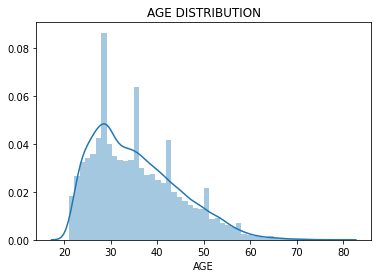

In [51]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(data["AGE"])
age_dist.set_title("AGE DISTRIBUTION")

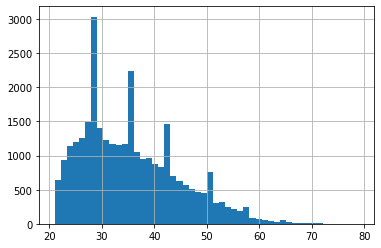

In [52]:
# Another way to plot a histogram of ages is shown below
data['AGE'].hist(bins=50)

In [53]:
data.groupby('SEX')['SEX'].count()

SEX
0    18217
1    11984
Name: SEX, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


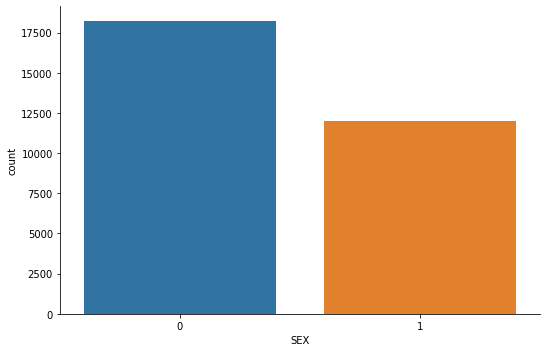

In [54]:
# Instead of a group by, use seaborn to plot the number of males and females
sns.factorplot('SEX', data=data, kind='count', aspect=1.5)

In [55]:
data.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0    10672
1     4952
2      470
3    14107
Name: EDUCATION, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


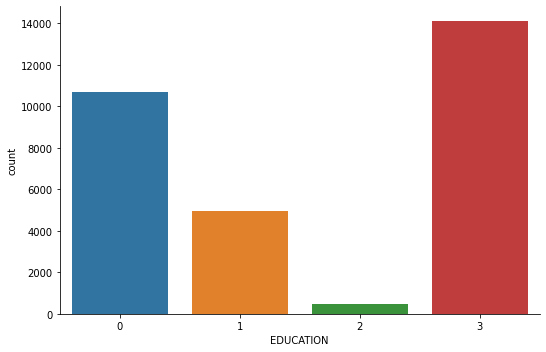

In [56]:
# Instead of a group by, use seaborn to plot the level of Education
sns.factorplot('EDUCATION', data=data, kind='count', aspect=1.5)

In [57]:
data.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13733
2    16088
3      326
Name: MARRIAGE, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


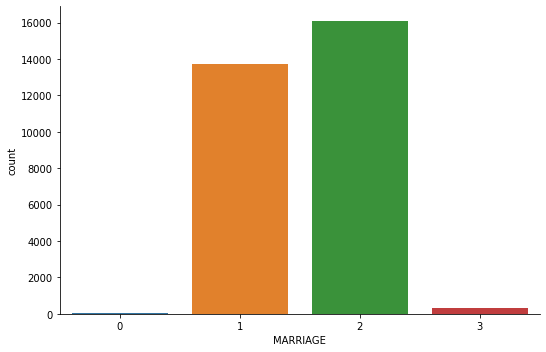

In [58]:
# Instead of a group by, use seaborn to plot the number of people that are married
sns.factorplot('MARRIAGE', data=data, kind='count', aspect=1.5)

#Exploratory Data Analysis.
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
This is a brief EDA because the project aims at Decision tree Ilustration

Text(0.5, 0, 'AGE')

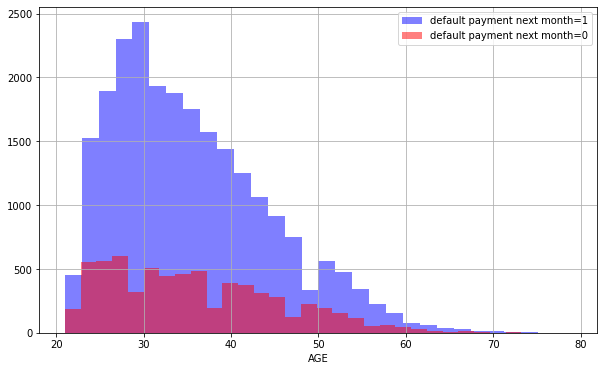

In [59]:
#Trying to visualize if there is a pattern between age might and default payment column
plt.figure(figsize=(10,6))
data[data['default payment next month']==1]['AGE'].hist(alpha=0.5,color='blue',
                                              bins=30,label='default payment next month=1')
data[data['default payment next month']==0]['AGE'].hist(alpha=0.5,color='red',
                                              bins=30,label='default payment next month=0')
plt.legend()
plt.xlabel('AGE')

Text(0.5, 0, 'AGE')

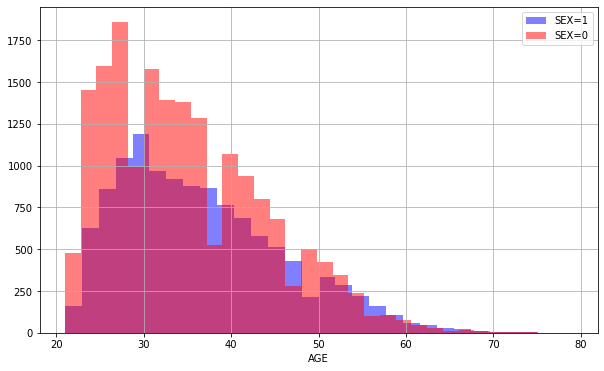

In [60]:
#Trying to visualize if there is a pattern betwwen sex might and age column
plt.figure(figsize=(10,6))
data[data['SEX']==1]['AGE'].hist(alpha=0.5,color='blue',
                                              bins=30,label='SEX=1')
data[data['SEX']==0]['AGE'].hist(alpha=0.5,color='red',
                                              bins=30,label='SEX=0')
plt.legend()
plt.xlabel('AGE')

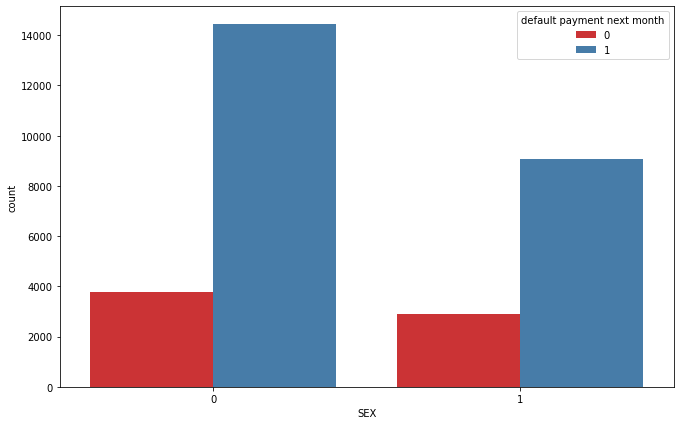

In [61]:
plt.figure(figsize=(11,7))
sns.countplot(x='SEX',hue='default payment next month',data=data,palette='Set1')

#Train test Split

In [62]:
from  sklearn.model_selection import train_test_split

In [63]:
X = data.drop('default payment next month',axis = 1)

In [64]:
y = data['default payment next month']

In [65]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=2)


#Training A decision tree model

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Model Evaluation

In [69]:
prediction = Tree.predict(X_testset)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score

In [71]:
print(classification_report(y_testset,prediction))

              precision    recall  f1-score   support

           0       0.70      0.32      0.44      2035
           1       0.83      0.96      0.89      7026

    accuracy                           0.82      9061
   macro avg       0.77      0.64      0.67      9061
weighted avg       0.80      0.82      0.79      9061



It has an accuracy of 77%

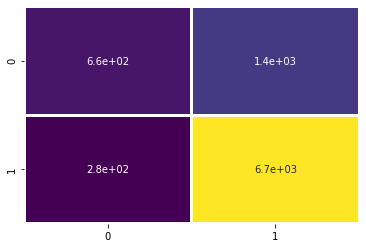

In [72]:
sns.heatmap(confusion_matrix(y_testset,prediction),cmap="viridis",lw = 2,annot=True,cbar=False)

In [73]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns)
# features

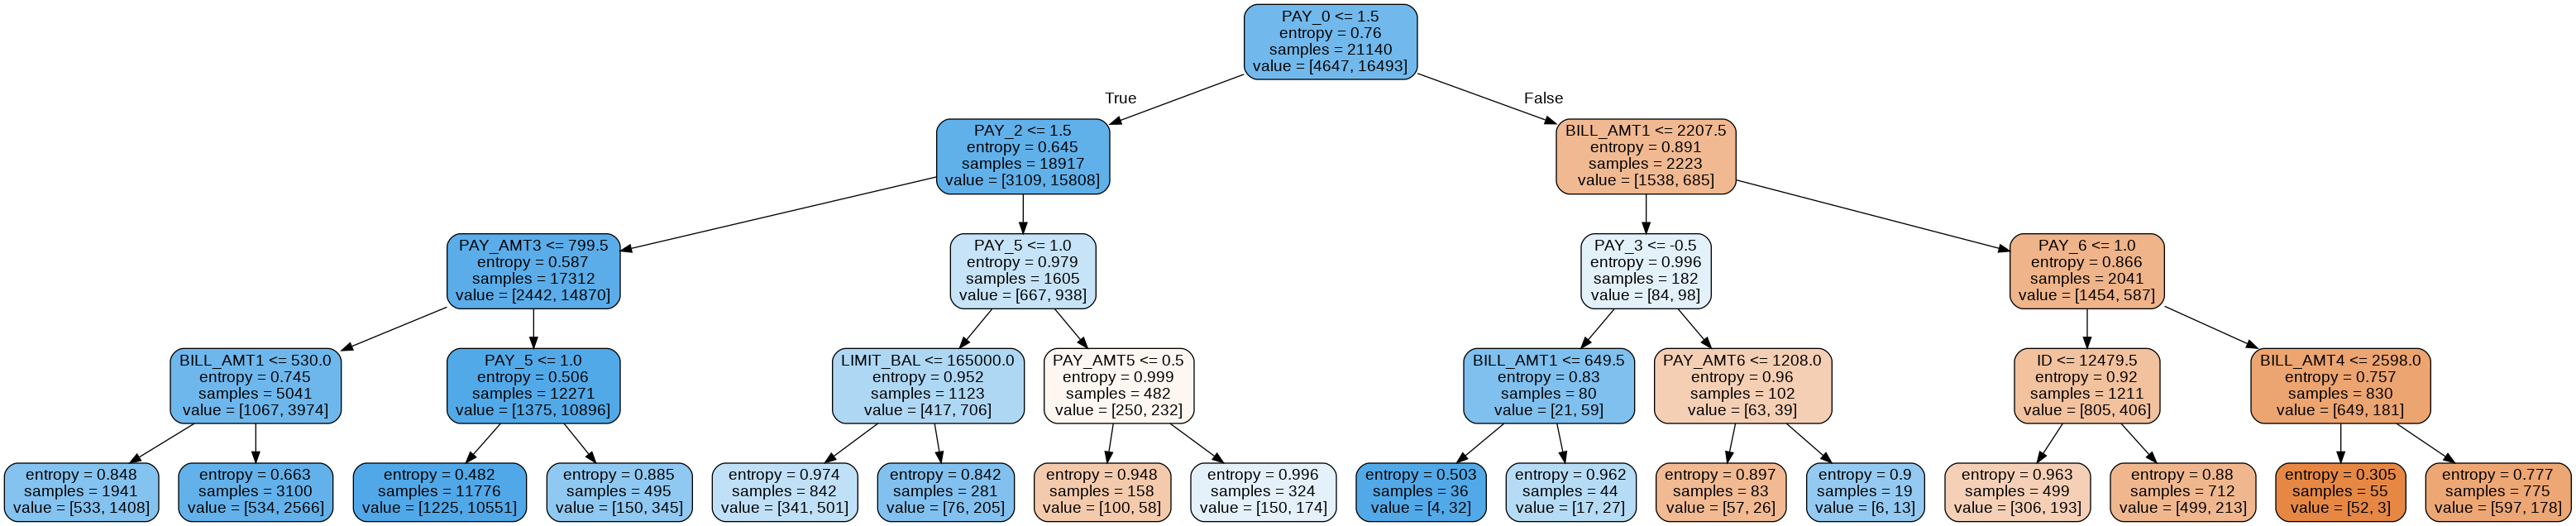

In [74]:
dot_data = StringIO()  
export_graphviz(Tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())